In [1]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [4]:
from PyChop import PyChop2

In [5]:
instrument = PyChop2('/SNS/users/lj7/dv/PyChop/SNS/arcs-v2.yaml', 'ARCS-100-1.5-SMI', 600)

In [6]:
instrument.ei = 100

In [7]:
print "Flux = " + str(instrument.getFlux()[0]) + ' n/cm^2/s'
print
print "EN(meV)  FWHM(meV)"
en = np.arange(-50, 100, 10)
res = instrument.getResolution(en)
for (x,y) in zip(en, res):
    print "%0.2f     %0.3f" % (x, y)

Flux = 10943.442085 n/cm^2/s

EN(meV)  FWHM(meV)
-50.00     5.988
-40.00     5.583
-30.00     5.193
-20.00     4.818
-10.00     4.459
0.00     4.118
10.00     3.795
20.00     3.491
30.00     3.208
40.00     2.948
50.00     2.711
60.00     2.501
70.00     2.320
80.00     2.172
90.00     2.061


Exp data

In [10]:
exp_E, exp_FWHM = np.load('./C4H2I2S-exp.npy')

Plot

<IPython.core.display.Javascript object>


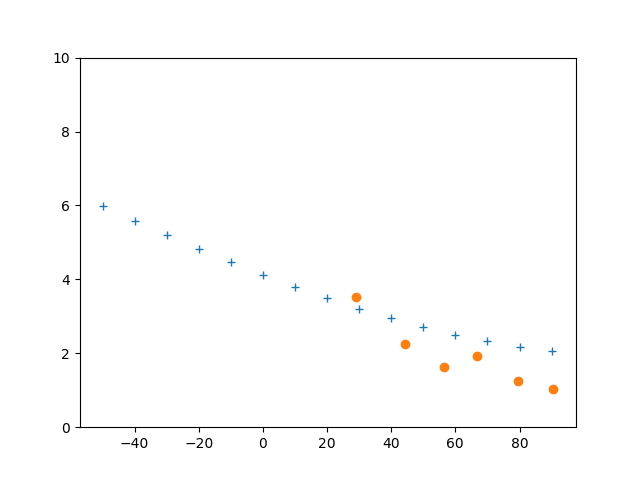

(0, 10)

In [11]:
plt.figure()
plt.plot(en, res, '+')
plt.plot(exp_E, exp_FWHM, 'o')
plt.ylim(0, 10)

# Compare to mcvine

In [13]:
ls

arcs1.yaml                                   mcvine-res-Ei_100/
arcs-v2.yaml                                 mcvine-resolutions-Ei_100.ipynb
arcs-v3.yaml                                 out/
arcs.yaml                                    res-sim/
C4H2I2S-2009data.ipynb                       sequoia.yaml
C4H2I2S-exp.ipynb                            test-ARCS-Ei_100.ipynb
C4H2I2S-exp.npy                              test-ARCS.ipynb
C4H2I2S-exp-try1.ipynb                       test-ARCS-v2.ipynb
cncs.yaml                                    test-ARCS-v3.ipynb
fit_and_interpolate-resolution-Ei_100.ipynb  test-CNCS.ipynb


In [14]:
import res_params_interped_funcs_Ei_100 as rpif

In [15]:
from dgsres import icg
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [16]:
def res_func(Eaxis, E0, interped_funcs, Ei, geom):
    "return resolution function y array for the given x axis (Eaxis). E is the energy transfer"
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    y = icg.resolution(Eaxis, Ei=100., E0=E0, geom=geom, **params)
    y/=y.sum()
    return y

In [17]:
Eaxis = np.arange(-30, 20, 0.01)

<IPython.core.display.Javascript object>


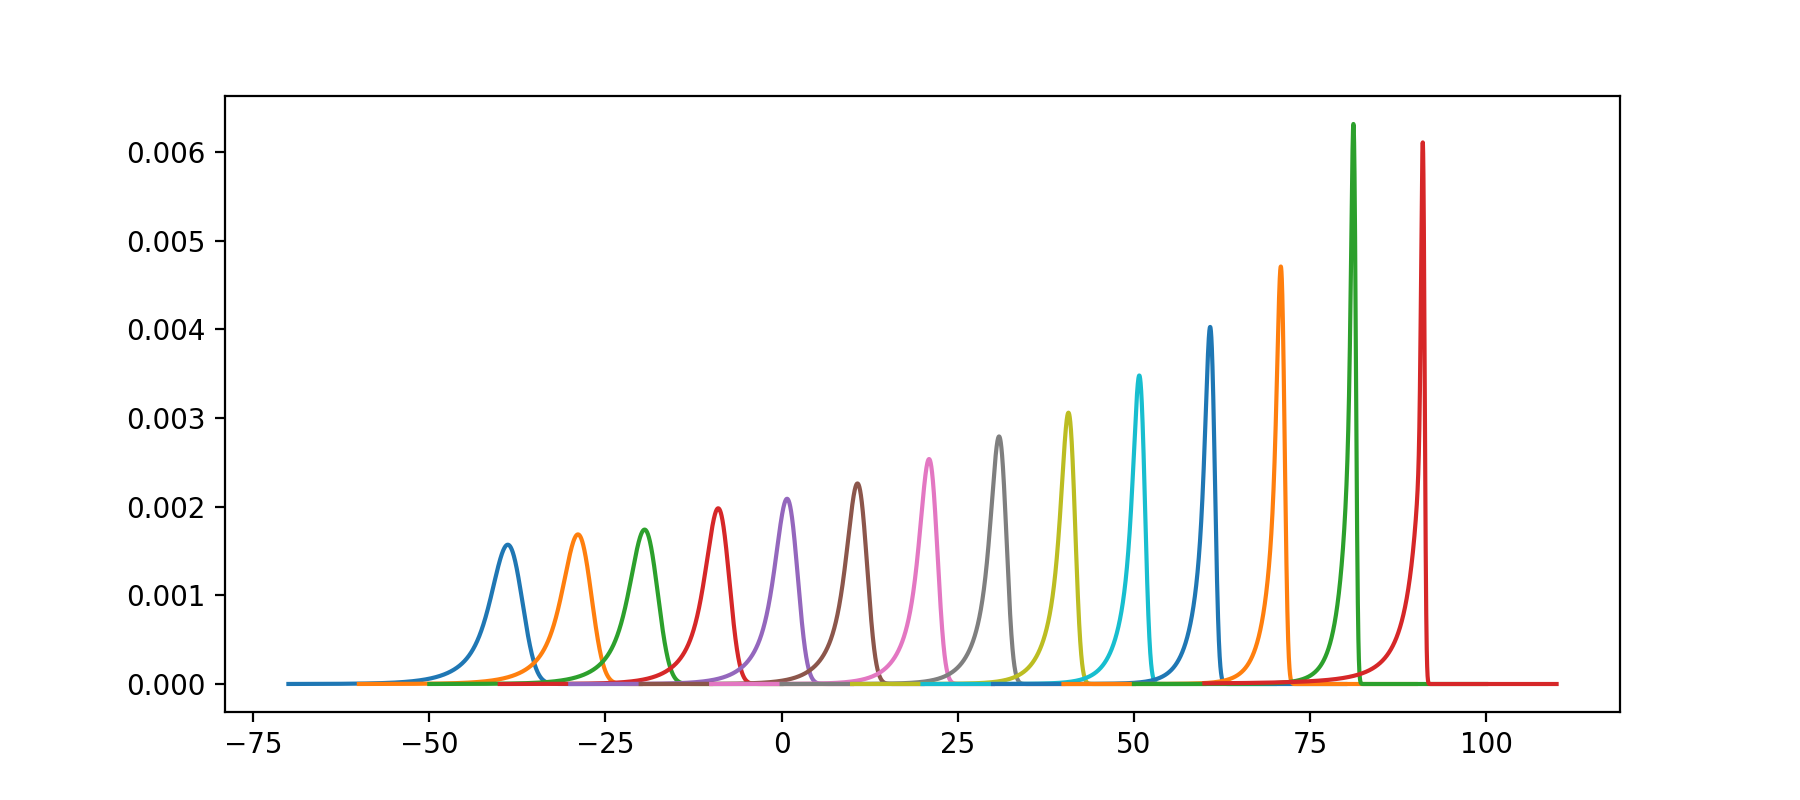

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:52: RuntimeWarning: overflow encountered in multiply
  C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:52: RuntimeWarning: invalid value encountered in multiply
  C0_a = sqp/sq2*T1*T2_a*erfc(vmin_a)
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:53: RuntimeWarning: overflow encountered in multiply
  C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a) - sqp*vmin_a * erfc(vmin_a))
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:53: RuntimeWarning: invalid value encountered in multiply
  C1_a = T1**2 * T2_a * (np.exp(-vmin_a*vmin_a) - sqp*vmin_a * erfc(vmin_a))
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/dgsres/icg.py:54: RuntimeWarning: overflow encountered in multiply
  C2_a = sq2 * T1**3 * T2_a * (sqp*(1./2+vmin_a**2)*erfc(vmin_a)-vmin_a*np.exp(-vmin_a**2))
/SNS/software/miniconda

In [18]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-40., 95., 10.):
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=100, geom=geom)
    plt.plot(x, y) #, '+-')
plt.show()

<IPython.core.display.Javascript object>


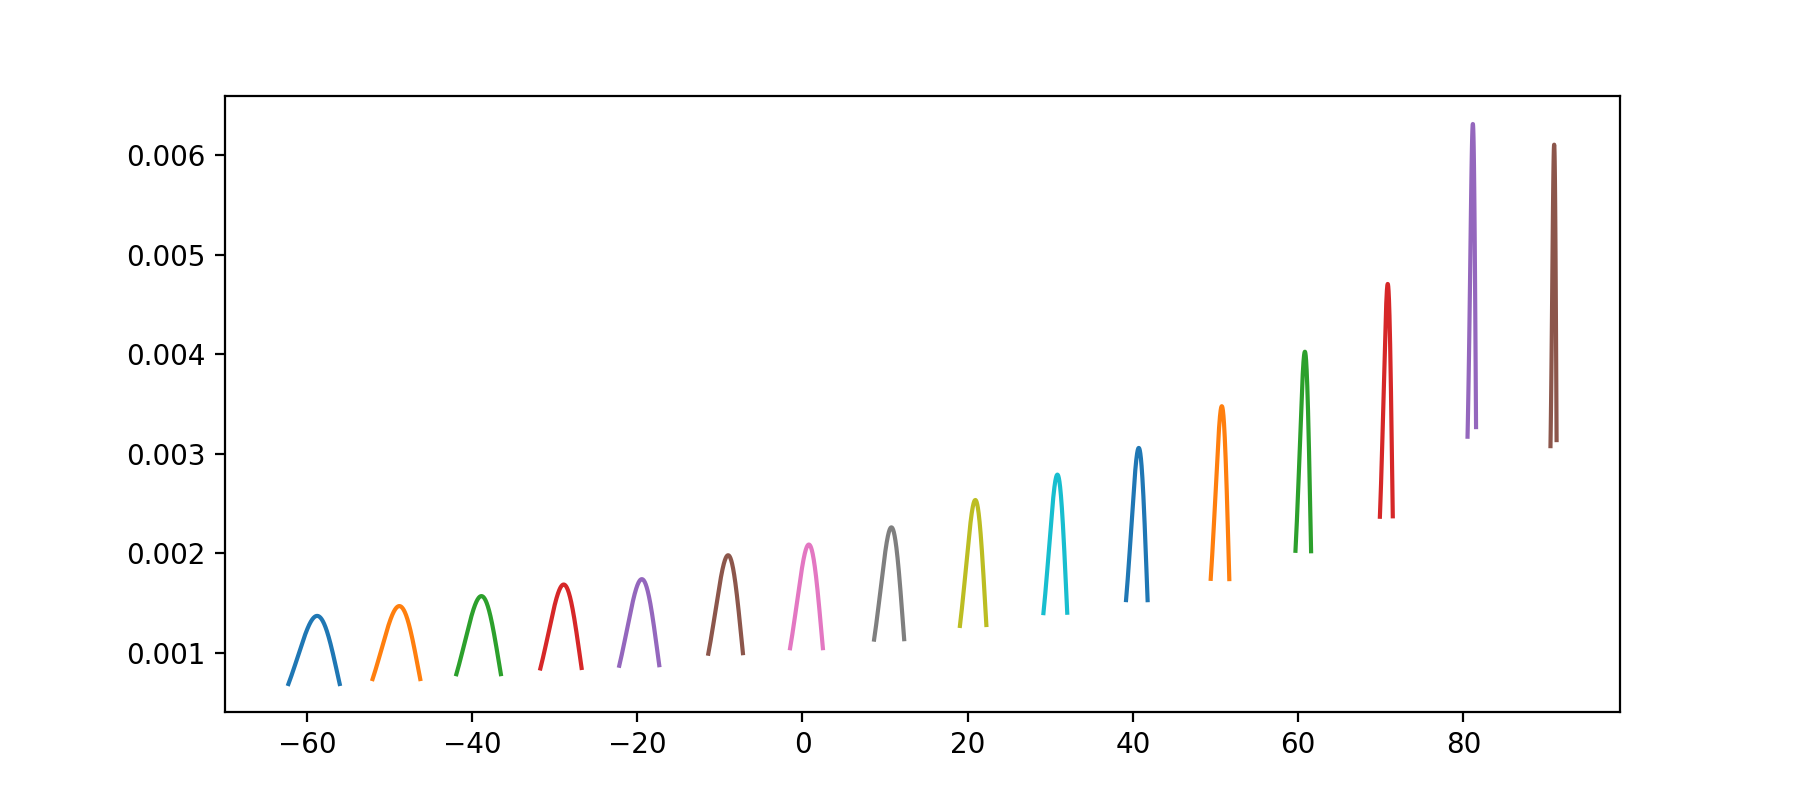

In [19]:
Etransfers = np.arange(-60., 95., 10.)
FWHMs = []
plt.figure(figsize=(9, 4))
for E0 in Etransfers:
    x = Eaxis + E0
    y = res_func(x, E0, rpif.interped_funcs, Ei=100, geom=geom)
    maxy = np.max(y)
    hm = maxy/2
    x1, y1 = x[y>hm], y[y>hm]
    plt.plot(x1, y1)
    FWHMs.append( x1[-1]-x1[0] )
plt.show()

<IPython.core.display.Javascript object>


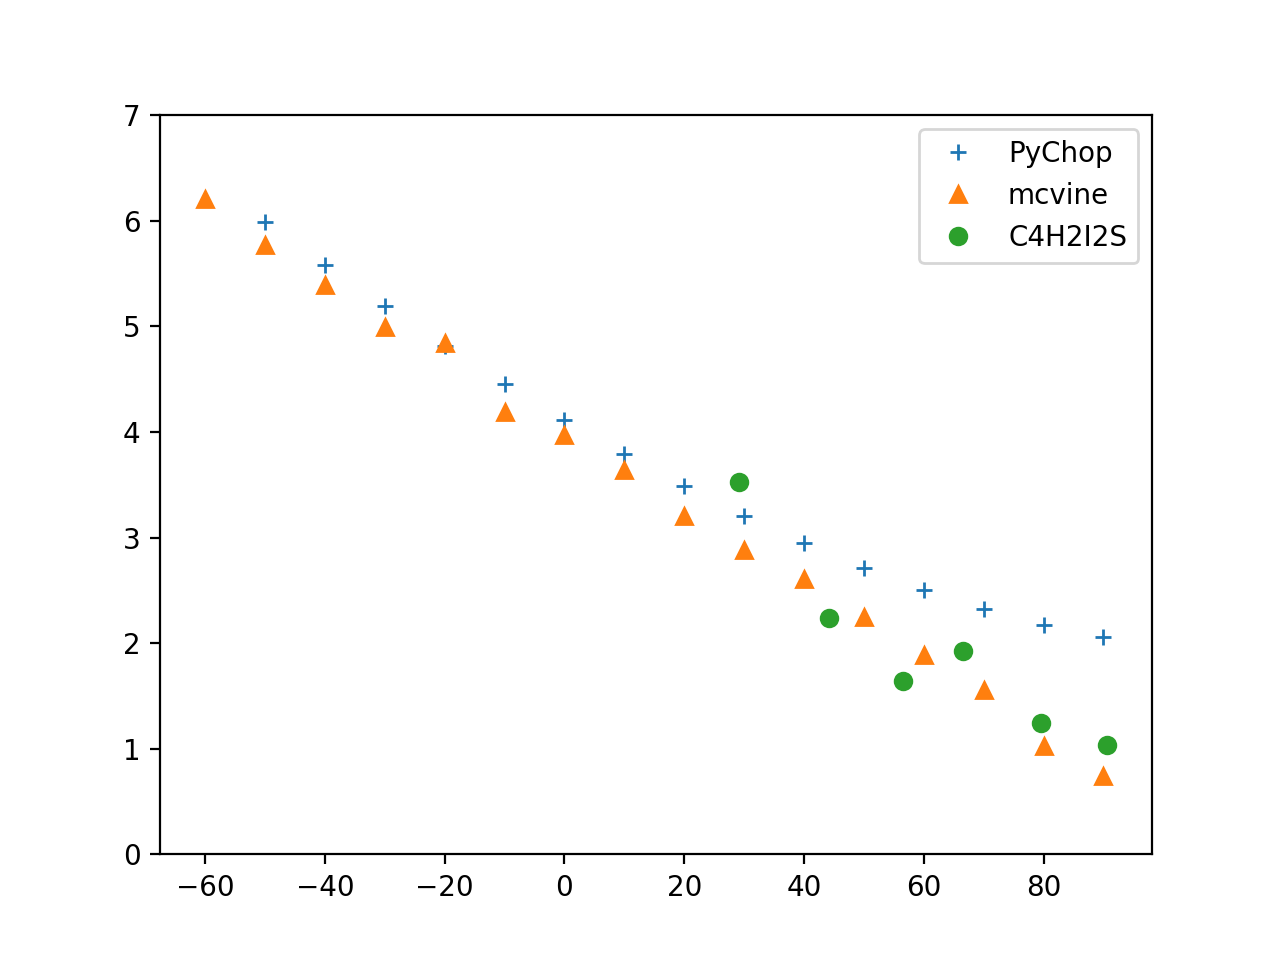

(0, 7)

In [23]:
plt.figure()
plt.plot(en, res, '+', label='PyChop')
plt.plot(Etransfers, FWHMs, '^', label='mcvine')
plt.plot(exp_E, exp_FWHM, 'o', label='C4H2I2S')
plt.legend()
plt.ylim(0, 7)